# Analyze the Results of Cross-Validation

## Set up the Environment

In [2]:
library(ggplot2)
library(ggpubr)
library(dplyr)
library(stringr)
library(unglue)

## Load the Results

In [3]:
df <- read.csv('reports/cv_long.csv')
colnames(df)[5] <- 'accuracy'
df[df$activation == 'relu', 'activation'] <- 'ReLU'
df[df$activation == 'spocu', 'activation'] <- 'SPOCU'
df

q,activation,architecture,c,accuracy
<dbl>,<chr>,<chr>,<dbl>,<dbl>
0.1,ReLU,[5],1,0.9172504
0.1,ReLU,[5],1,0.5002189
0.1,ReLU,[5],1,0.8990585
0.1,ReLU,[5],1,0.9156996
0.1,ReLU,[10],1,0.9205342
0.1,ReLU,[10],1,0.9181261
0.1,ReLU,[10],1,0.9060653
0.1,ReLU,[10],1,0.9106635
0.1,ReLU,[20],1,0.9165937


### Break Column `architecture` into `depth` and `width`

In [4]:
df$depth <- str_count(df$architecture, ',') + 1

In [5]:
df$width <- as.numeric(str_extract(df$architecture, '\\d+'))

### Cast the Factor Columns as Nominal and Ordered Factors

In [6]:
df$q <- ordered(df$q)
df$c <- ordered(df$c)
df$architecture <- factor(df$architecture)
df$activation <- factor(df$activation)
df$depth <- ordered(df$depth)
df$width <- ordered(df$width)

## Show the Best Configurations

In [7]:
arrange(df, desc(accuracy))

q,activation,architecture,c,accuracy,depth,width
<ord>,<fct>,<fct>,<ord>,<dbl>,<ord>,<ord>
0.1,ReLU,"[10, 10, 10, 10, 10]",0.1,0.9273205,5,10
0.05,ReLU,"[100, 100, 100, 100, 100]",1,0.9273205,5,100
0.05,ReLU,"[20, 20]",0.1,0.9273205,2,20
0.1,ReLU,"[20, 20, 20, 20, 20]",1,0.9271016,5,20
0.1,ReLU,"[100, 100, 100, 100, 100]",1,0.9271016,5,100
0.1,ReLU,"[10, 10, 10, 10, 10, 10, 10, 10, 10, 10]",1,0.9271016,10,10
0.05,ReLU,[50],0.1,0.9268827,1,50
0.1,ReLU,"[100, 100, 100]",1,0.9266637,3,100
0.1,ReLU,"[20, 20, 20]",0.1,0.9266637,3,20


## Plot the Results

### Visualize Main Effects

In [7]:
ecdf.relu <- ecdf(df[df$activation == 'ReLU', 'accuracy'])

ecdf.relu(0.93) - ecdf.relu(0.90)

[1] 0.965

In [41]:
wilcox.test(accuracy ~ activation, data=df, paired=TRUE)


	Wilcoxon signed rank test with continuity correction

data:  accuracy by activation
V = 76578, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



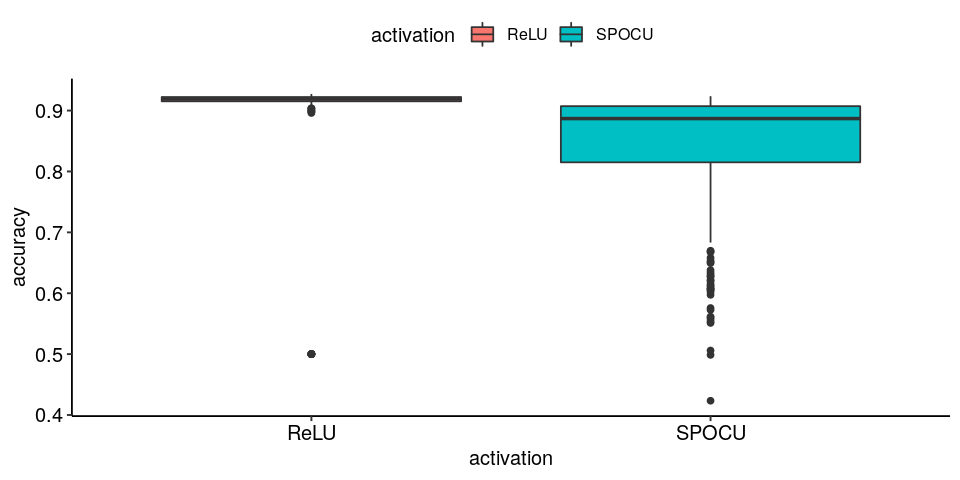

In [8]:
options(repr.plot.width=8, repr.plot.height=4)

g <- ggplot(data=df, aes(activation, accuracy)) +
geom_boxplot(aes(fill=activation)) + 
theme_pubr()

ggsave(filename = 'reports/dbnn/cv/activation.pdf', g)
ggsave(filename = 'reports/dbnn/cv/activation.eps', g)
g

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



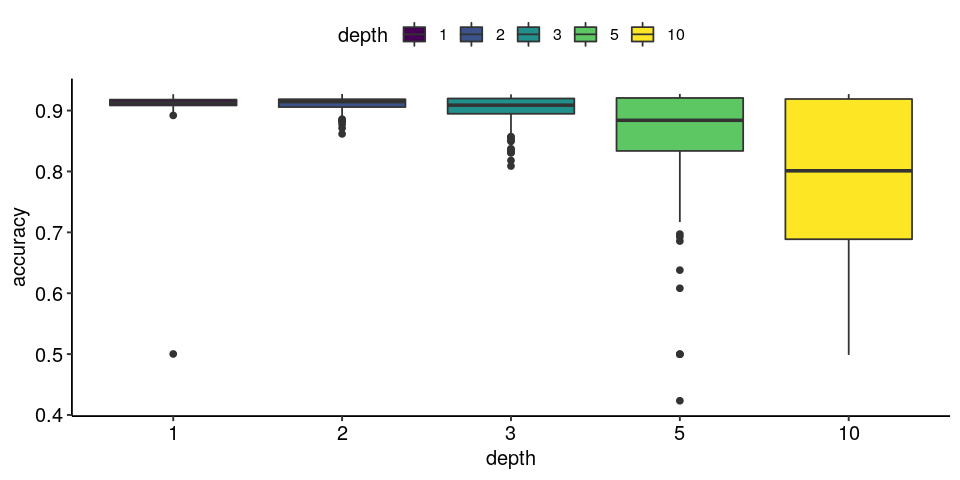

In [9]:
g <- ggplot(data=df, aes(depth, accuracy)) + geom_boxplot(aes(fill=depth)) + theme_pubr()

ggsave(filename = 'reports/dbnn/cv/depth.pdf', g)
ggsave(filename = 'reports/dbnn/cv/depth.eps', g)

g

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



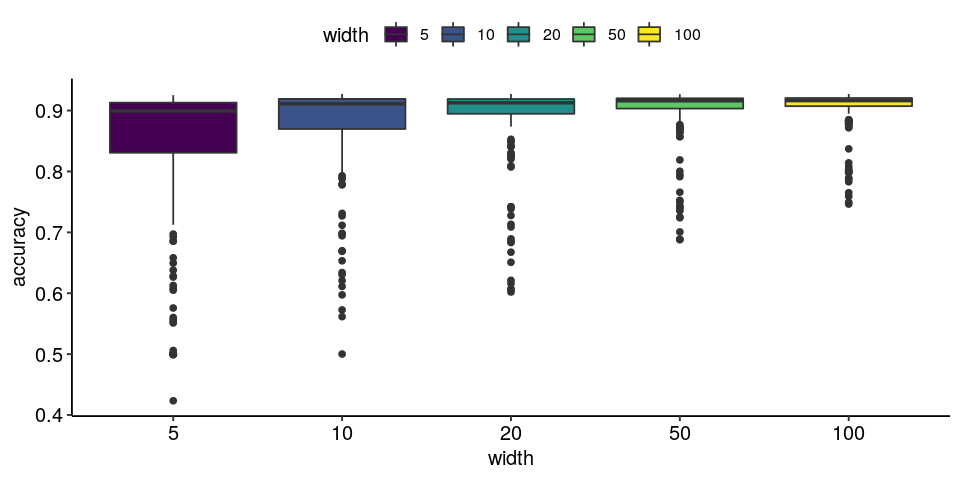

In [10]:
g <- ggplot(data=df, aes(width, accuracy)) + geom_boxplot(aes(fill=width)) + theme_pubr()

ggsave(filename = "reports/dbnn/cv/width.pdf", g)
ggsave(filename = "reports/dbnn/cv/width.eps", g)

g

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



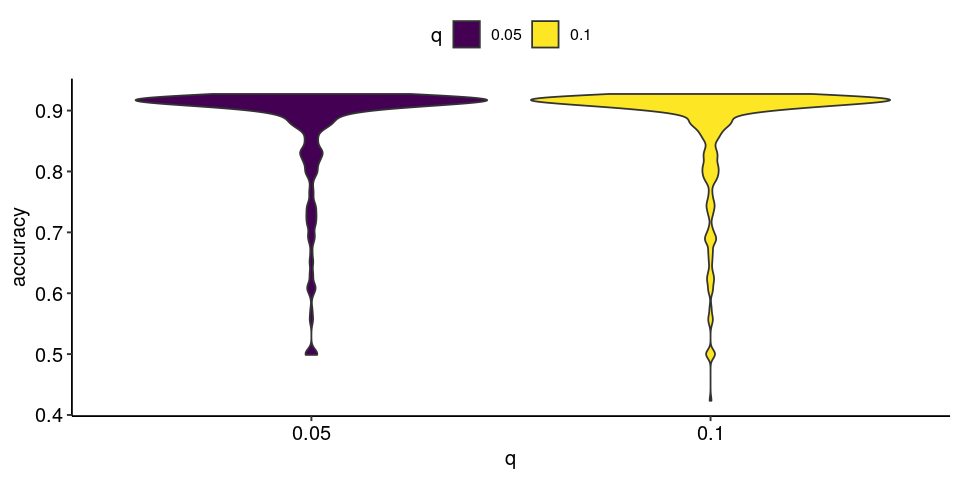

In [11]:
g <- ggplot(data=df, aes(q, accuracy)) + geom_violin(aes(fill=q)) + theme_pubr()

ggsave(filename = "reports/dbnn/cv/q.pdf", g)
ggsave(filename = "reports/dbnn/cv/q.eps", g)

g

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



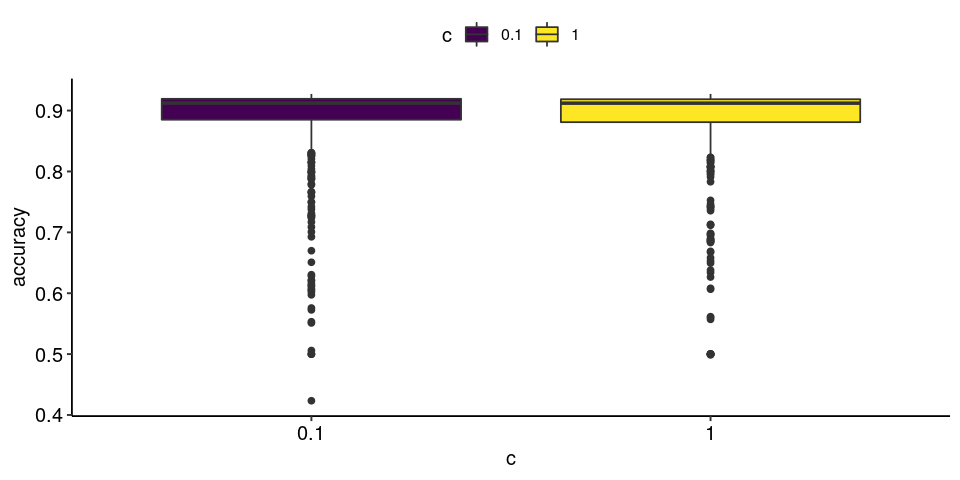

In [12]:
g <- ggplot(data=df, aes(c, accuracy)) + geom_boxplot(aes(fill=c)) + theme_pubr()

ggsave(filename = "reports/dbnn/cv/c.pdf", g)
ggsave(filename = "reports/dbnn/cv/c.pdf", g)

g

### Visualize Two-Way Interactions

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



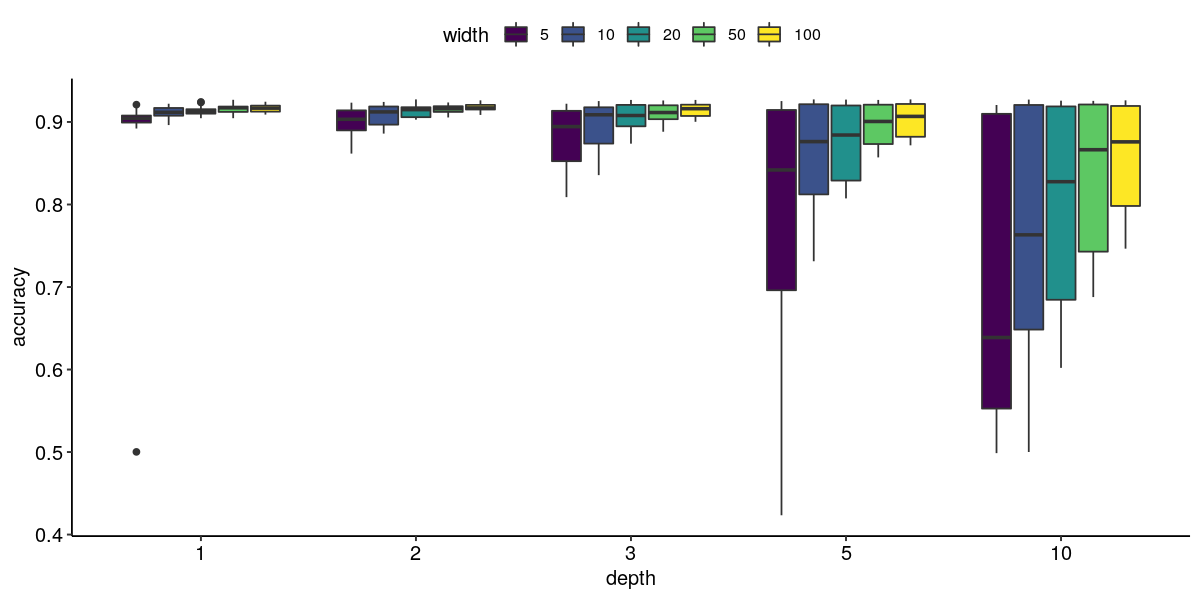

In [13]:
options(repr.plot.width=10, repr.plot.height=5)

g <- ggplot(data=df, aes(depth, accuracy)) + geom_boxplot(aes(fill=width)) + theme_pubr()

ggsave(filename = "reports/dbnn/cv/depth_width.pdf", g)
ggsave(filename = "reports/dbnn/cv/depth_width.eps", g)

g

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



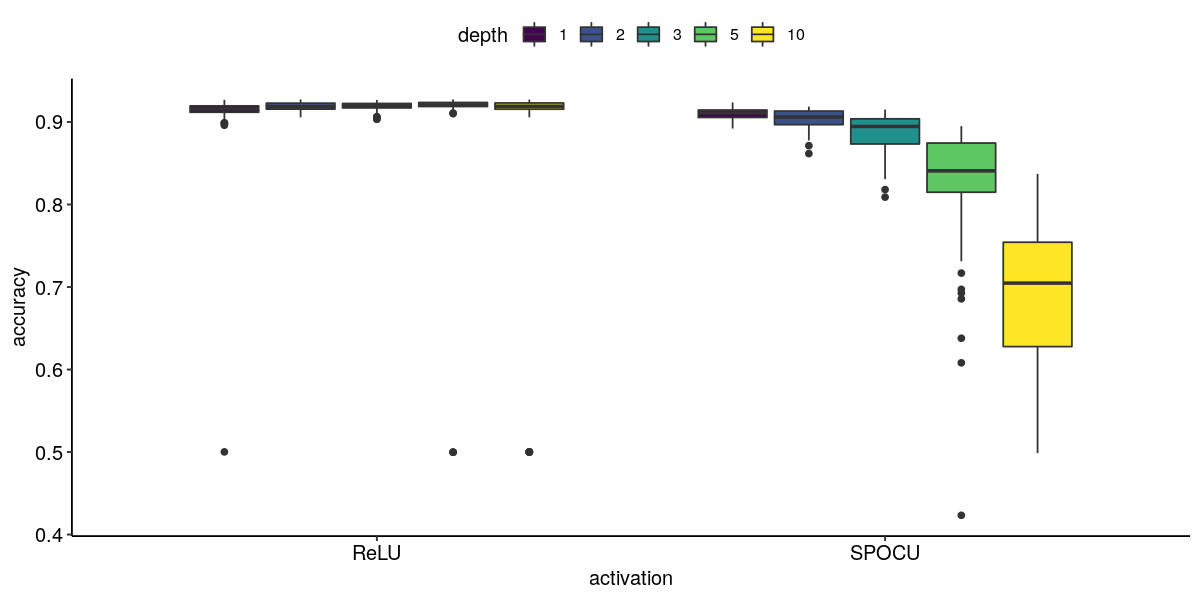

In [14]:
g <- ggplot(data=df, aes(activation, accuracy)) + geom_boxplot(aes(fill=depth)) +
     theme_pubr()

ggsave(filename = "reports/dbnn/cv/activation_depth.pdf", g)
ggsave(filename = "reports/dbnn/cv/activation_depth.pdf", g)

g

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



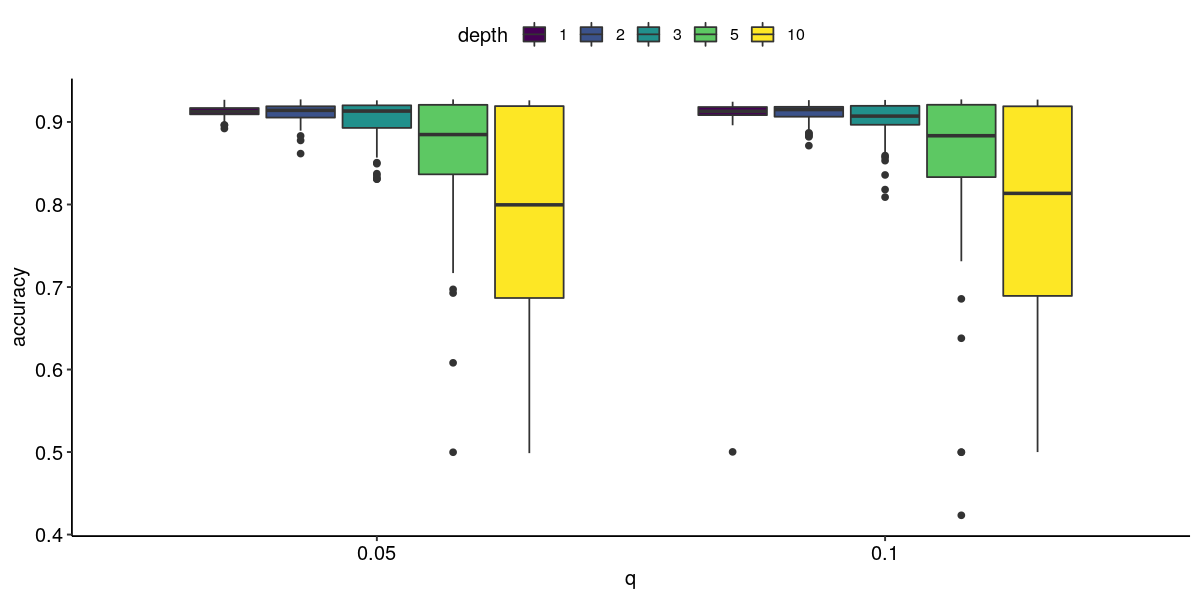

In [15]:
g <- ggplot(data=df, aes(q, accuracy)) + geom_boxplot(aes(fill=depth)) + theme_pubr()

ggsave(filename = "reports/dbnn/cv/depth_q.pdf", g)
ggsave(filename = "reports/dbnn/cv/depth_q.pdf", g)

g

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



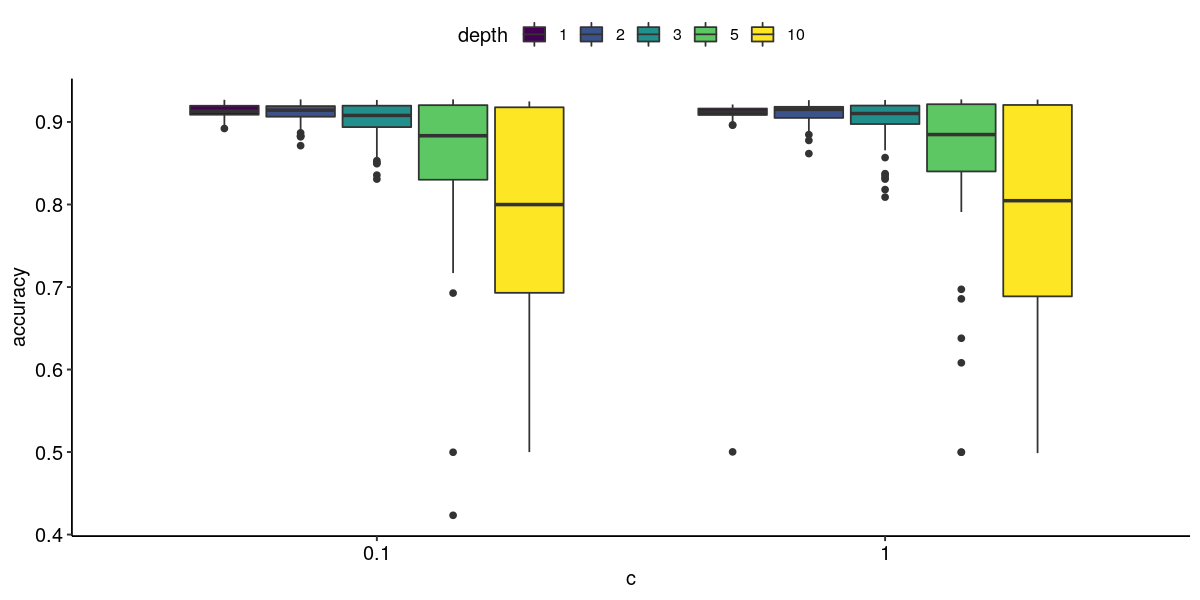

In [16]:
g <- ggplot(data=df, aes(c, accuracy)) + geom_boxplot(aes(fill=depth)) + theme_pubr()

ggsave(filename = "reports/dbnn/cv/depth_c.pdf", g)
ggsave(filename = "reports/dbnn/cv/depth_c.eps", g)

g

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



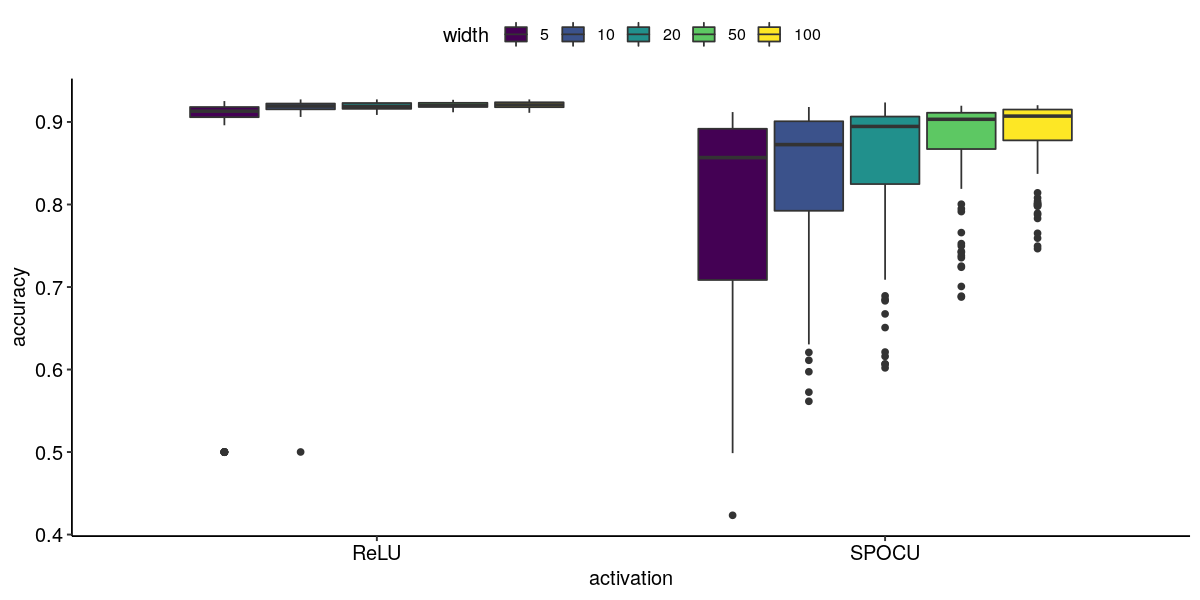

In [17]:
g <- ggplot(data=df, aes(activation, accuracy)) + geom_boxplot(aes(fill=width)) + theme_pubr()

ggsave(filename = "reports/dbnn/cv/width_activation.pdf", g)
ggsave(filename = "reports/dbnn/cv/width_activation.eps", g)

g

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



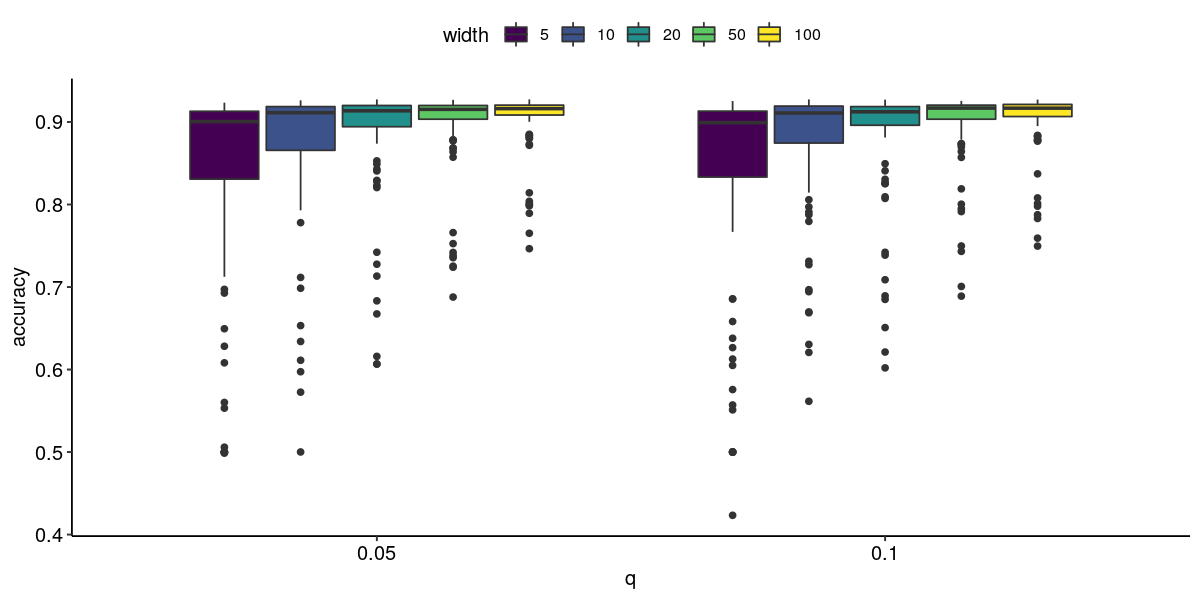

In [18]:
g <- ggplot(data=df, aes(q, accuracy)) + geom_boxplot(aes(fill=width)) + theme_pubr()

ggsave(filename = "reports/dbnn/cv/width_q.pdf", g)
ggsave(filename = "reports/dbnn/cv/width_q.eps", g)

g

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



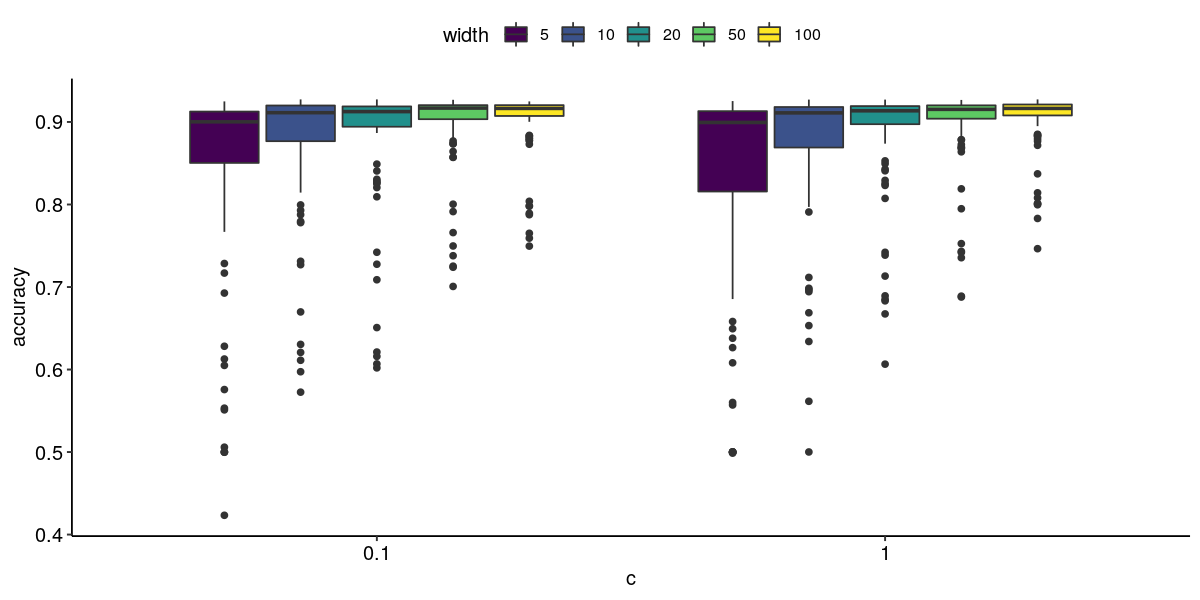

In [19]:
g <- ggplot(data=df, aes(c, accuracy)) + geom_boxplot(aes(fill=width)) + theme_pubr()

ggsave(filename = "reports/dbnn/cv/width_c.pdf", g)
ggsave(filename = "reports/dbnn/cv/width_c.eps", g)

g

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



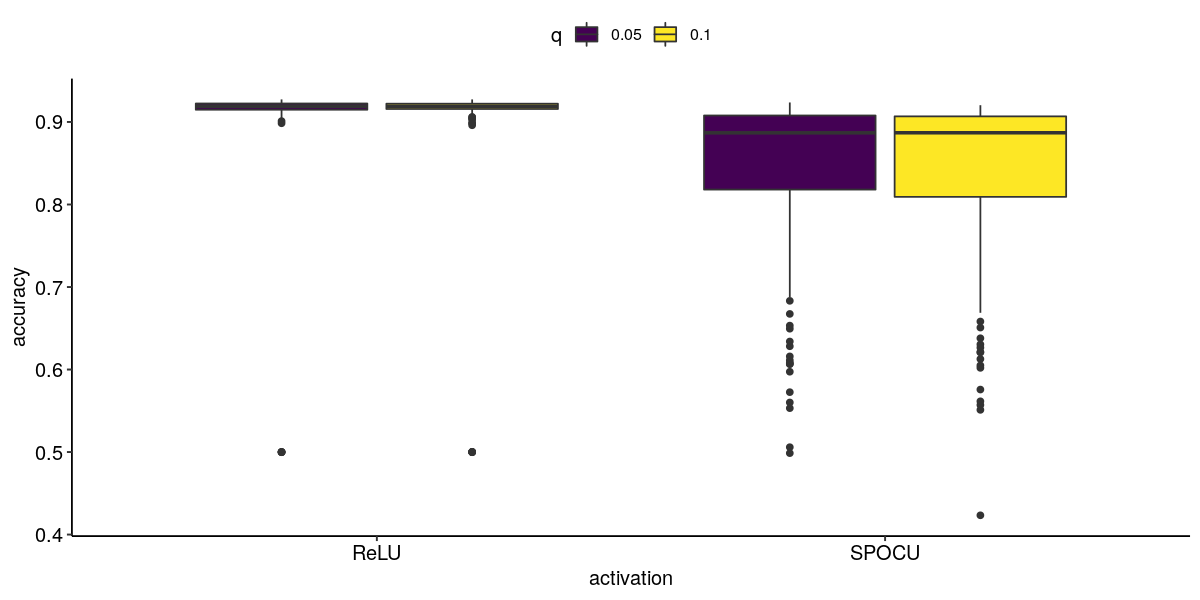

In [20]:
g <- ggplot(data=df, aes(activation, accuracy)) + geom_boxplot(aes(fill=q)) + theme_pubr()

ggsave(filename = "reports/dbnn/cv/activation_q.pdf", g)
ggsave(filename = "reports/dbnn/cv/activation_q.eps", g)

g

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



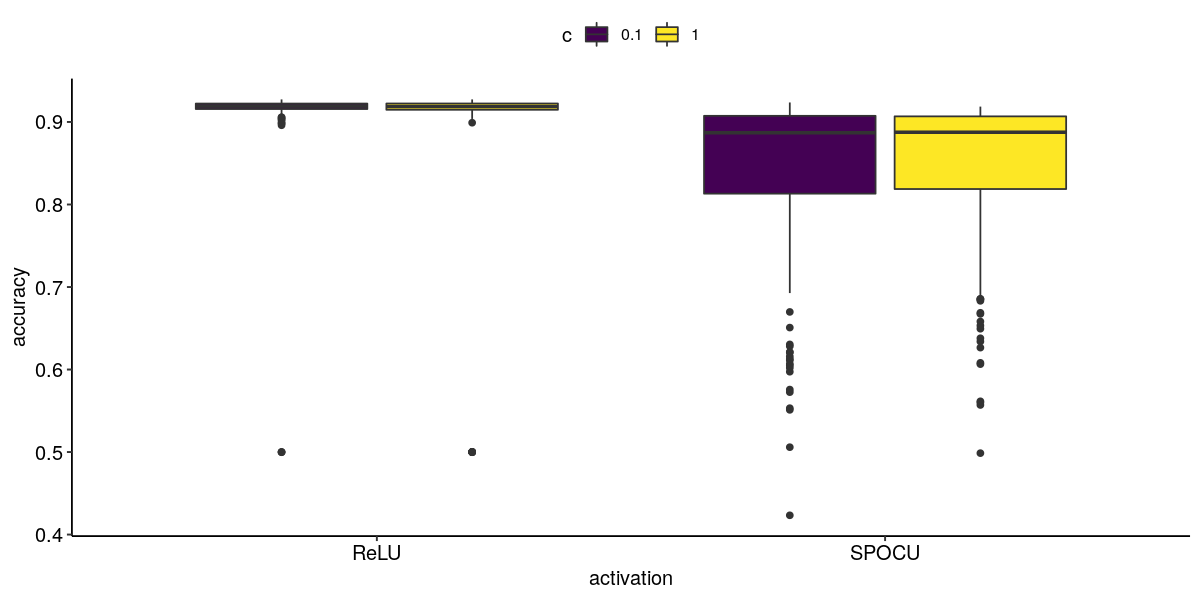

In [21]:
g <- ggplot(data=df, aes(activation, accuracy)) + geom_boxplot(aes(fill=c)) + theme_pubr()

ggsave(filename = "reports/dbnn/cv/activation_c.pdf", g)
ggsave(filename = "reports/dbnn/cv/activation_c.eps", g)

g

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



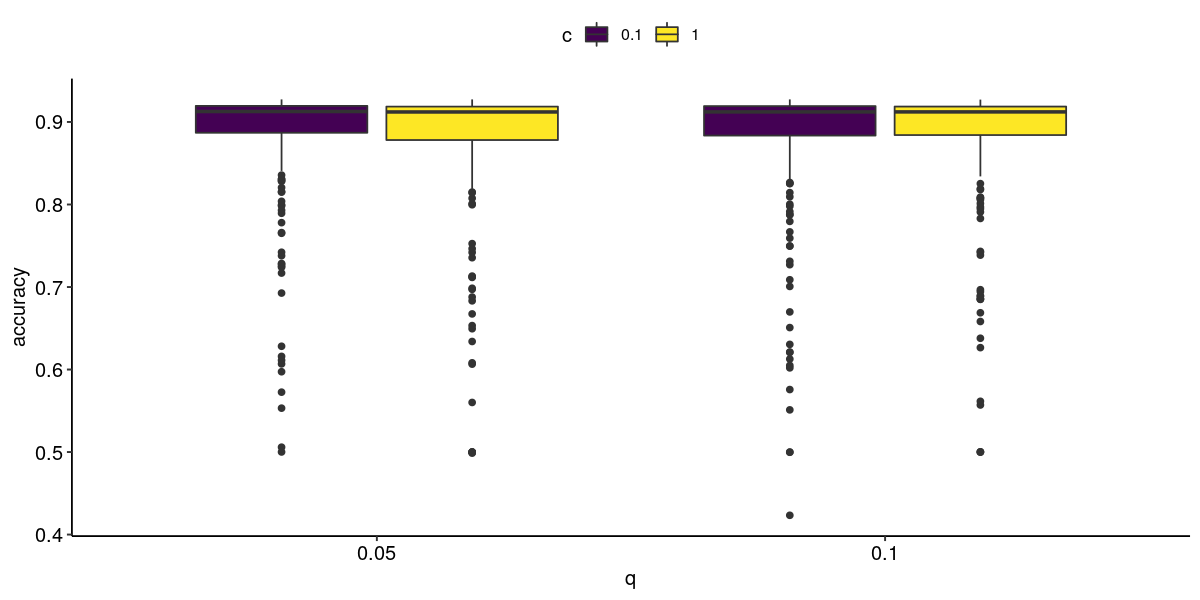

In [22]:
g <- ggplot(data=df, aes(q, accuracy)) + geom_boxplot(aes(fill=c)) + theme_pubr()

ggsave(filename = "reports/dbnn/cv/q_c.pdf", g)
ggsave(filename = "reports/dbnn/cv/q_c.eps", g)

g

### Visualize Three-Way Interactions

Check the interaction of `depth`, `width`, and `activation`.

In [23]:
?facet_wrap

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



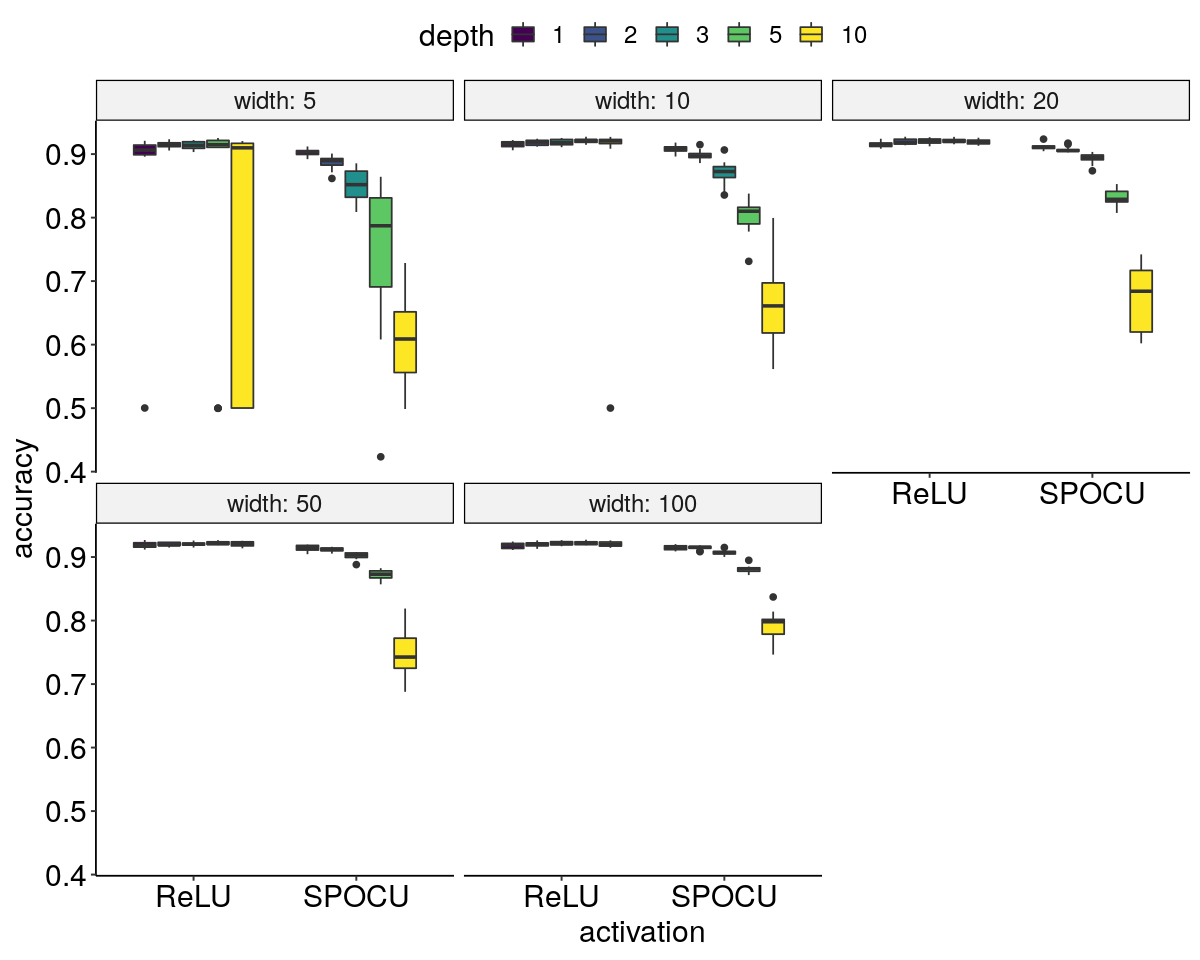

In [24]:
options(repr.plot.width=10, repr.plot.height=8)

g <- ggplot(data=df, aes(activation, accuracy)) + 
     geom_boxplot(aes(fill=depth)) + theme_pubr() + 
     facet_wrap(~width, labeller = label_both) + 
     theme(text=element_text(size=18))

ggsave(filename = "reports/dbnn/cv/activation_depth_width.pdf", g)
ggsave(filename = "reports/dbnn/cv/activation_depth_width.eps", g)

g

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



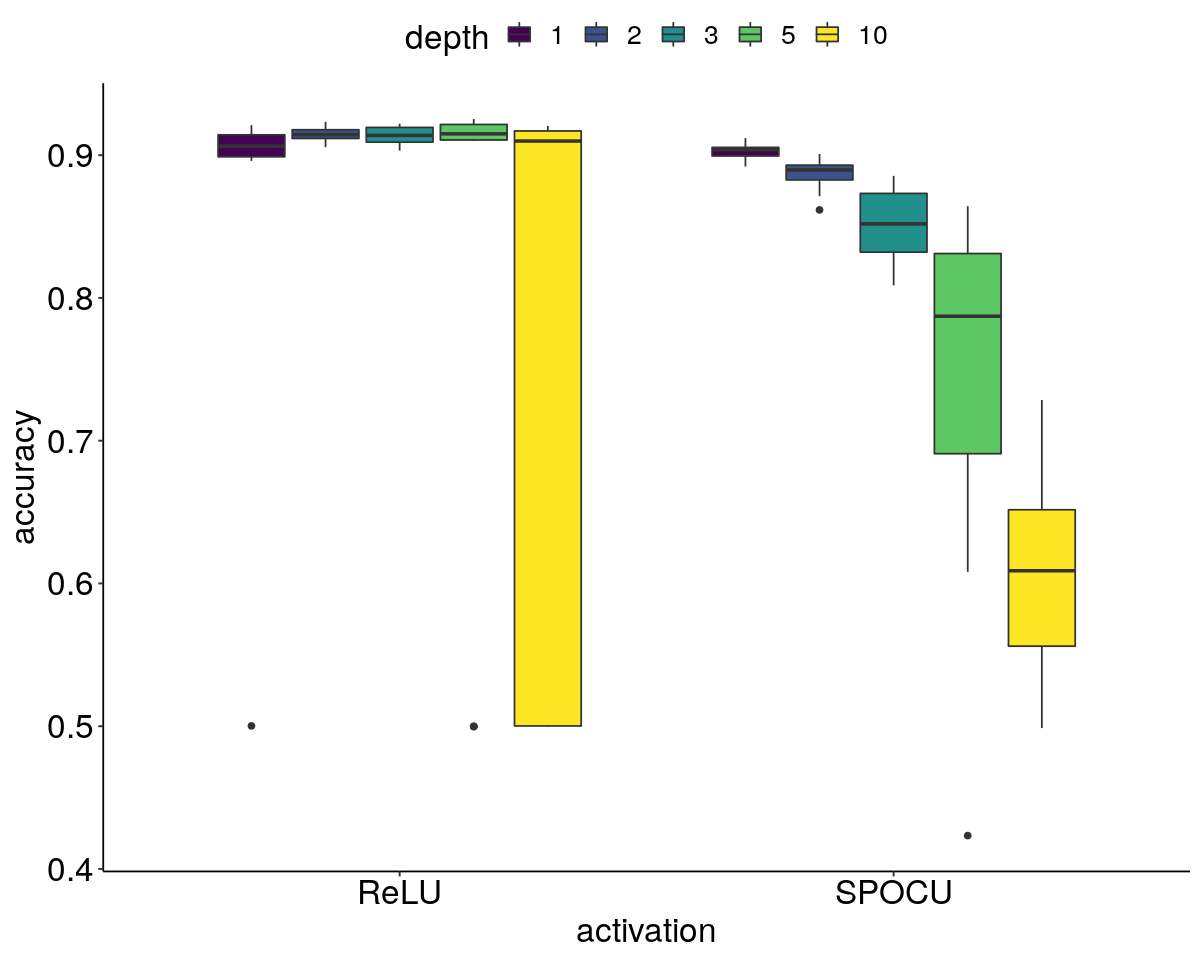

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



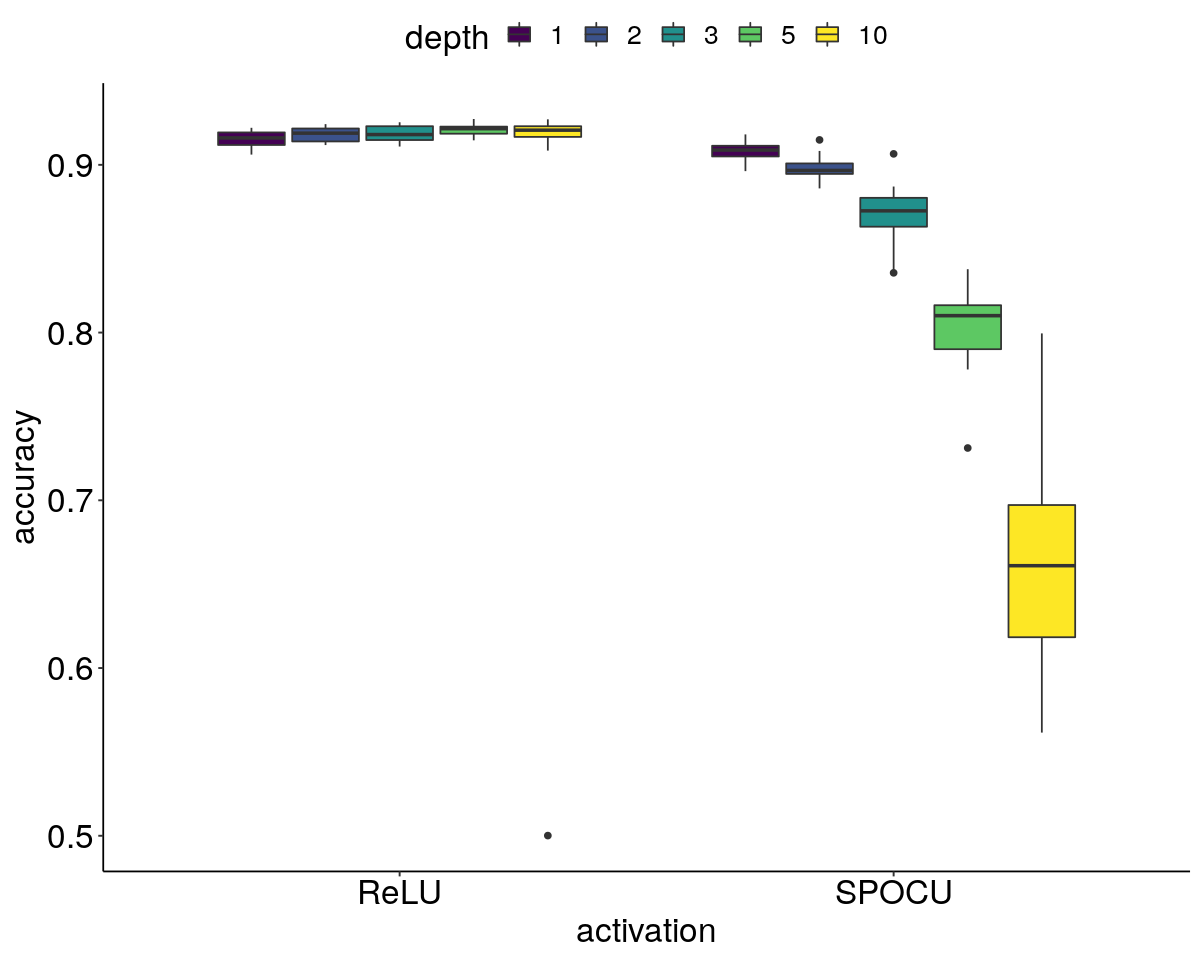

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



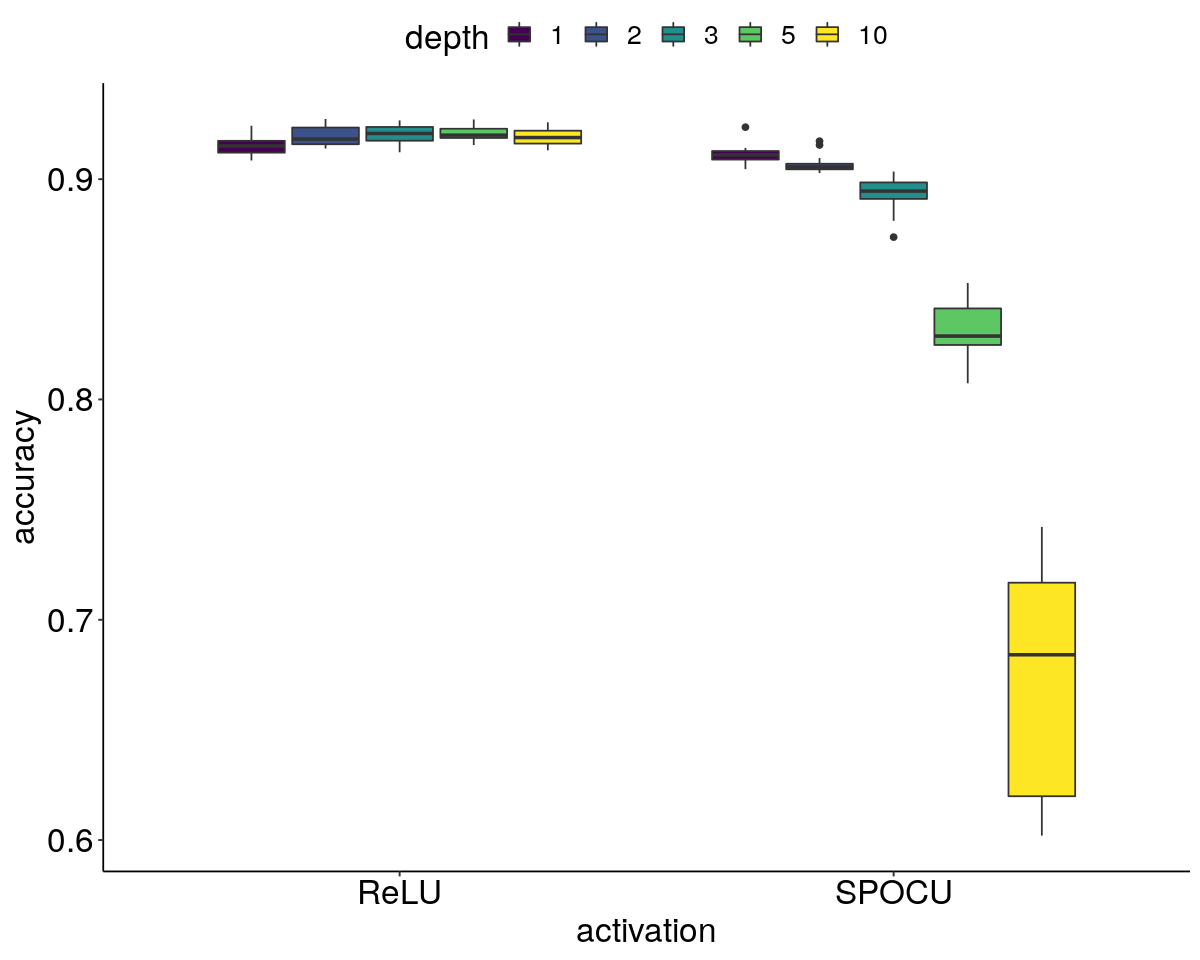

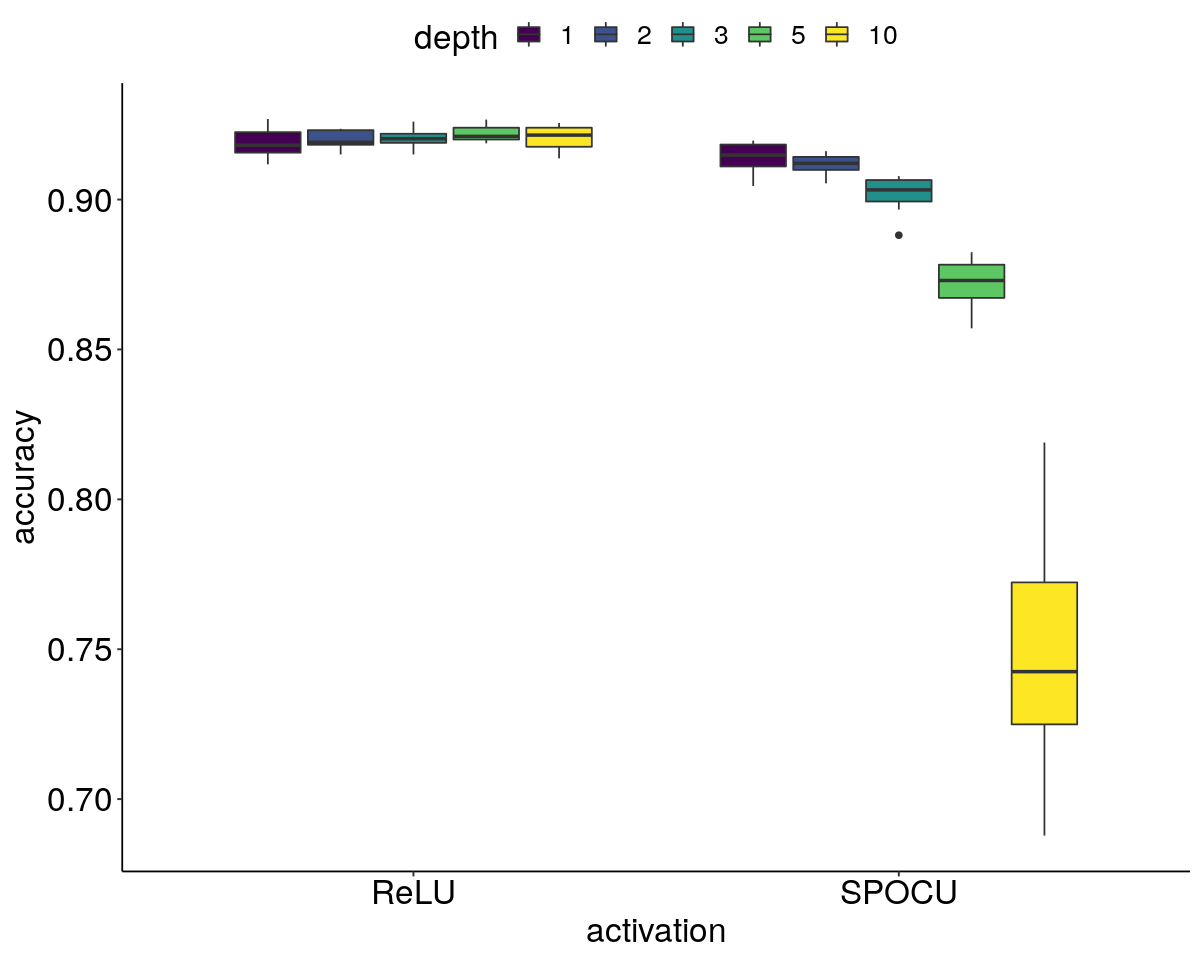

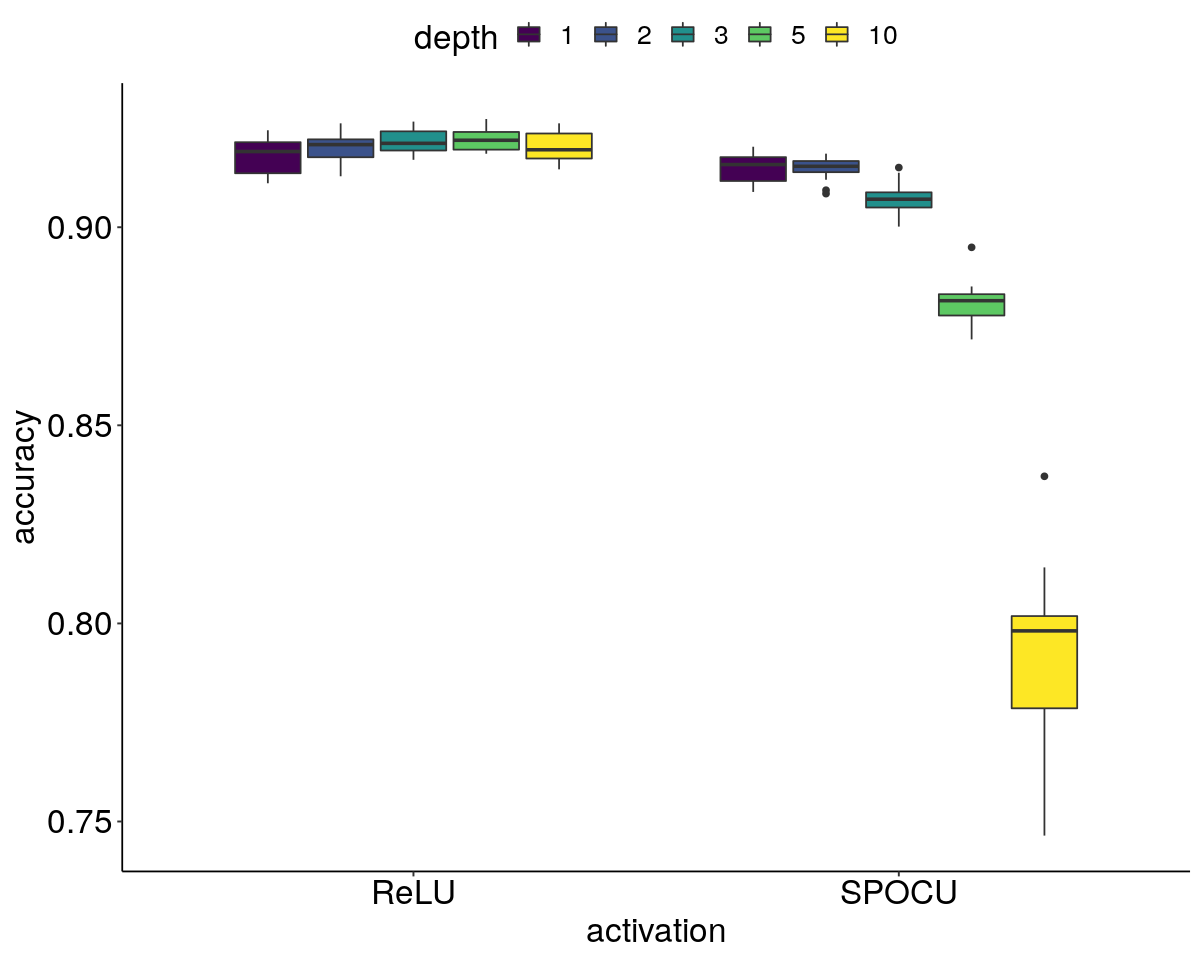

In [25]:
for (w in levels(df$width)){
    g <- ggplot(data=df[df$width == w , ], aes(activation, accuracy)) + 
         geom_boxplot(aes(fill=depth)) + theme_pubr() + 
         #labs(title=sprintf('Width = %s', w)) + 
         theme(text=element_text(size=20))
    
    ggsave(filename = sprintf('reports/dbnn/cv/w_%s.pdf', w), plot = g)
    ggsave(filename = sprintf('reports/dbnn/cv/w_%s.eps', w), plot = g)
    
    print(g)
}

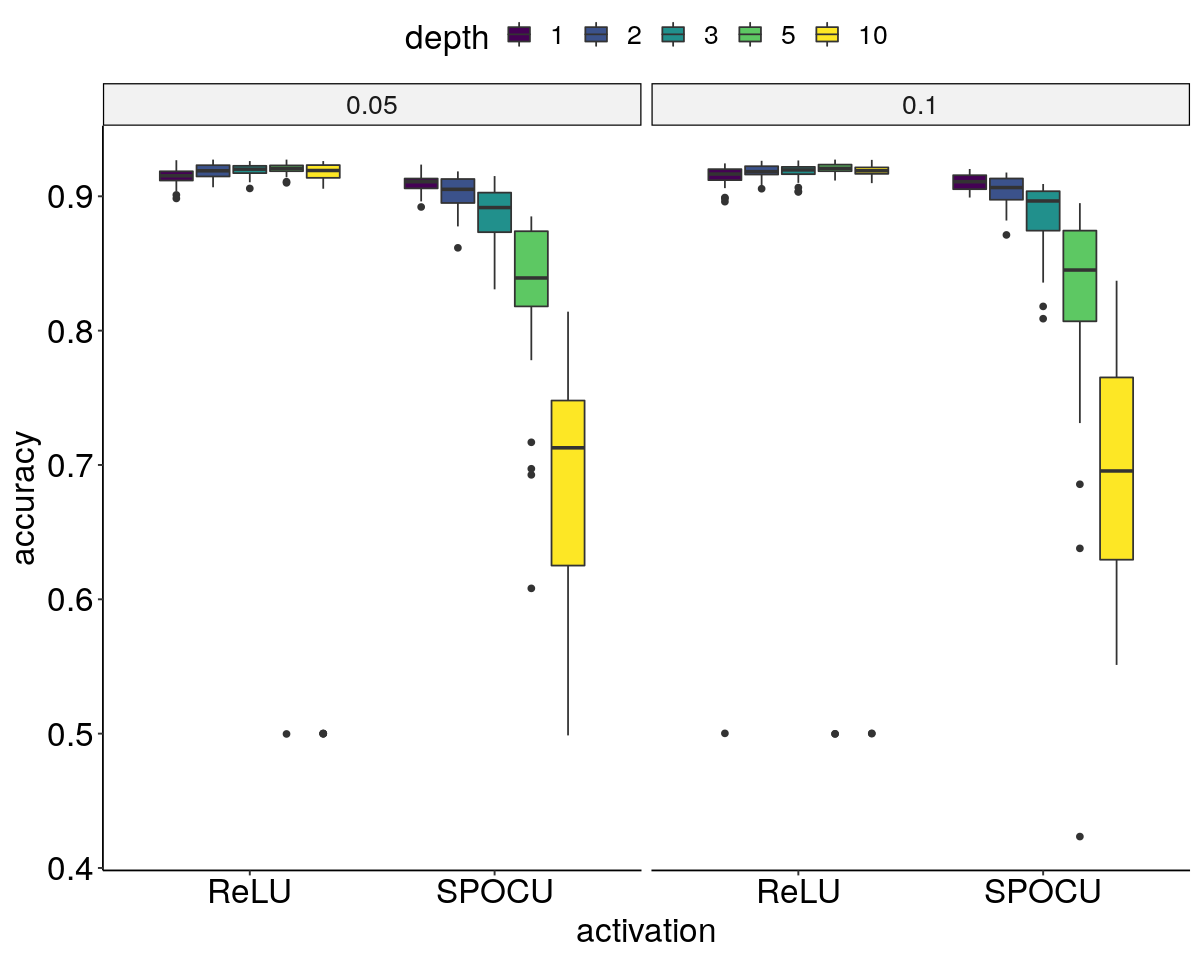

In [26]:
options(repr.plot.width=10, repr.plot.height=8)

ggplot(data=df, aes(activation, accuracy)) + 
geom_boxplot(aes(fill=depth)) + theme_pubr() + 
facet_wrap(~q) + 
theme(text=element_text(size=20))

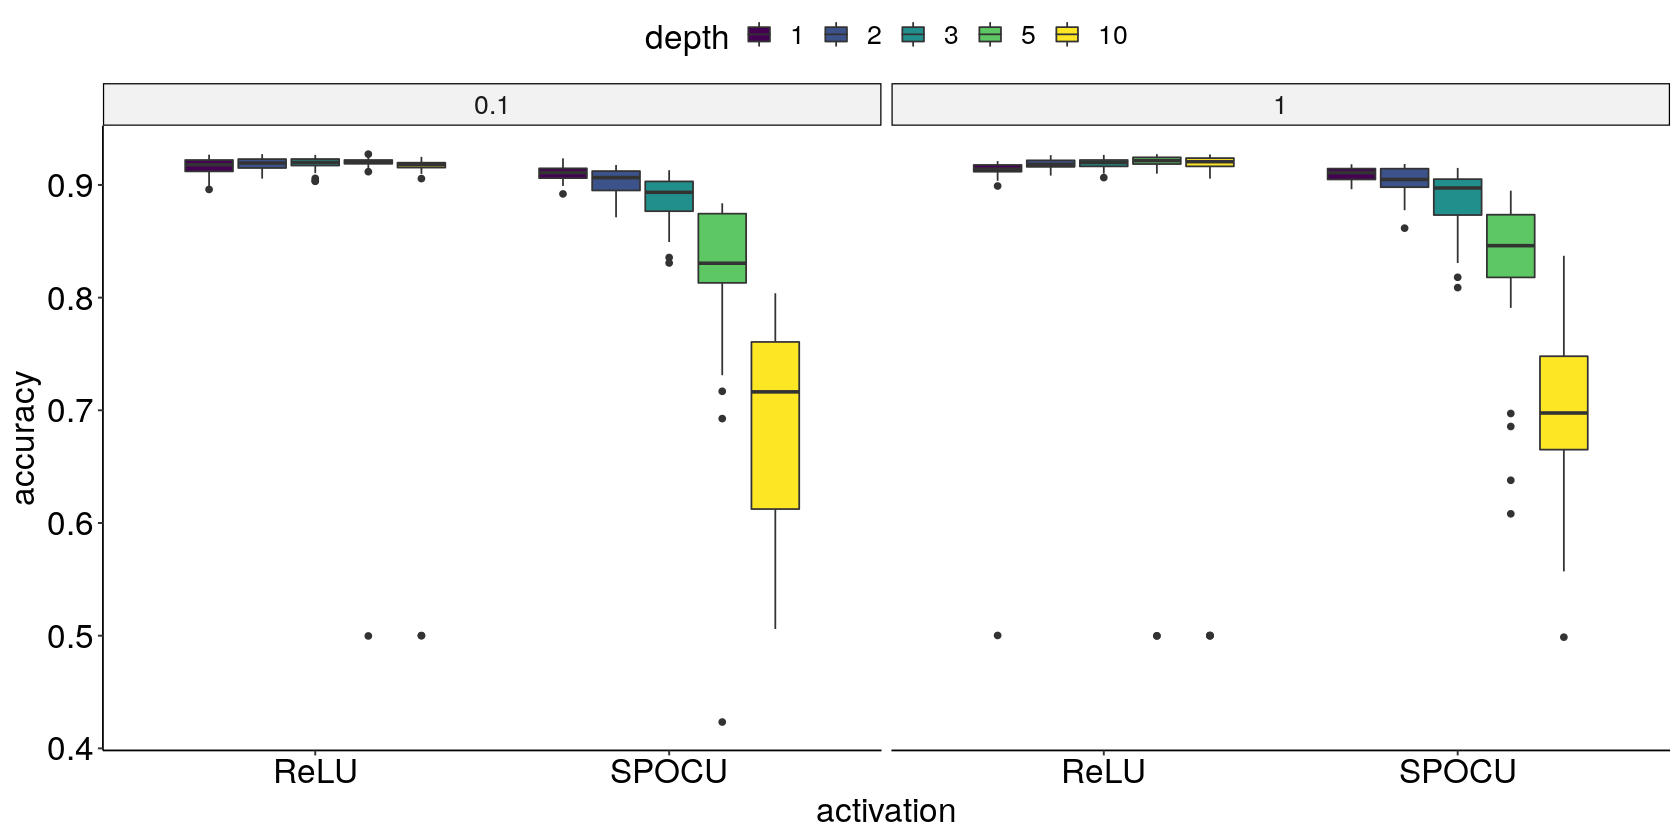

In [27]:
options(repr.plot.width=14, repr.plot.height=7)

ggplot(data=df, aes(activation, accuracy)) + 
geom_boxplot(aes(fill=depth)) + theme_pubr() + 
facet_wrap(~c) + 
theme(text=element_text(size=20))

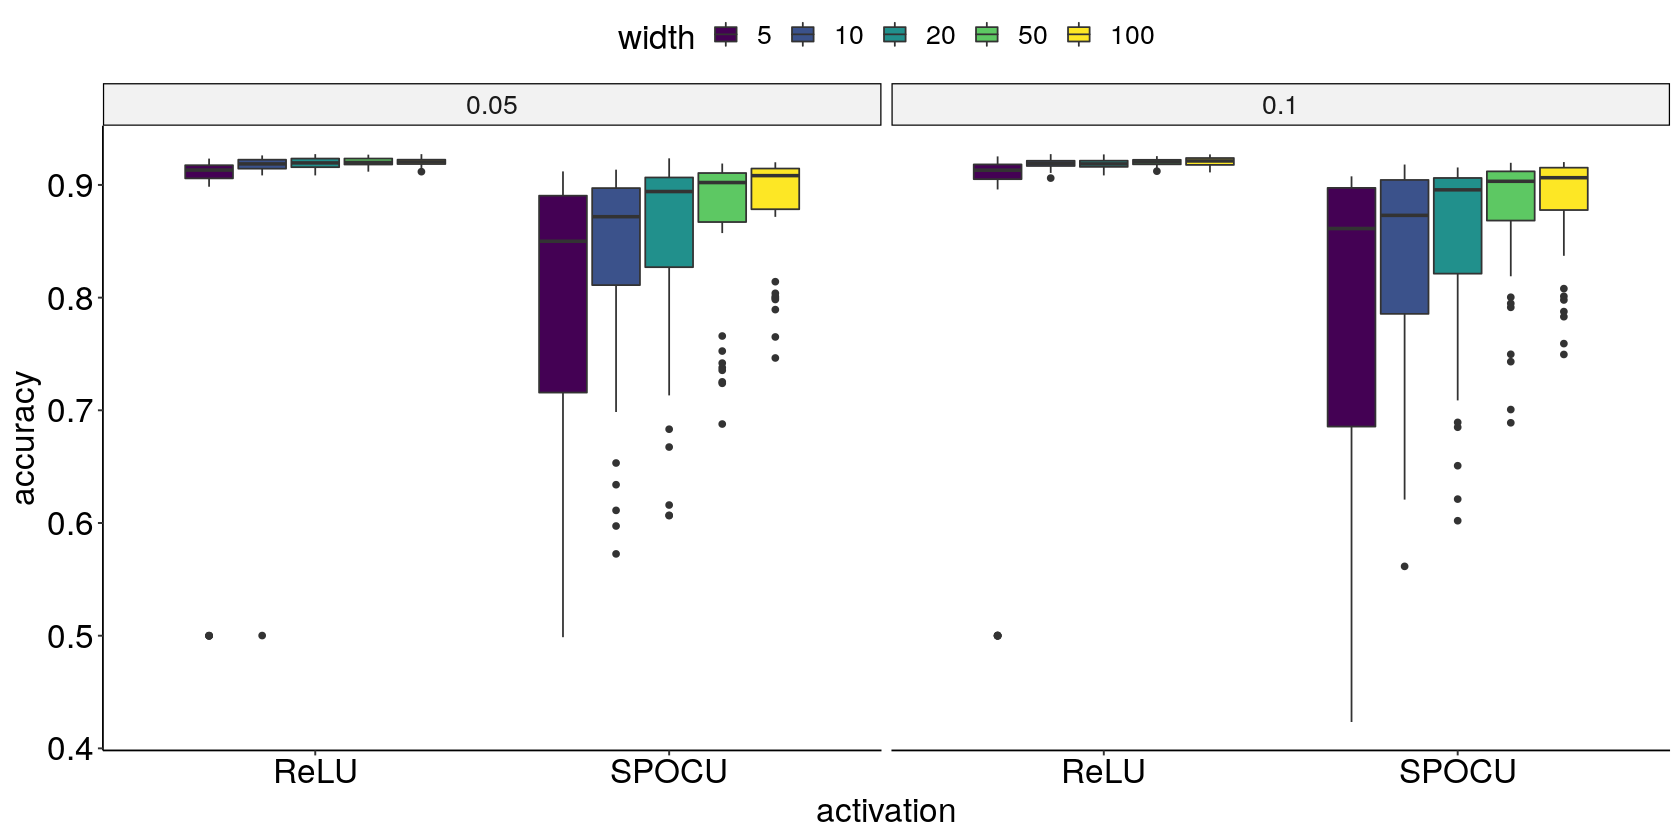

In [28]:
ggplot(data=df, aes(activation, accuracy)) + 
geom_boxplot(aes(fill=width)) + theme_pubr() + 
facet_wrap(~q) + 
theme(text=element_text(size=20))

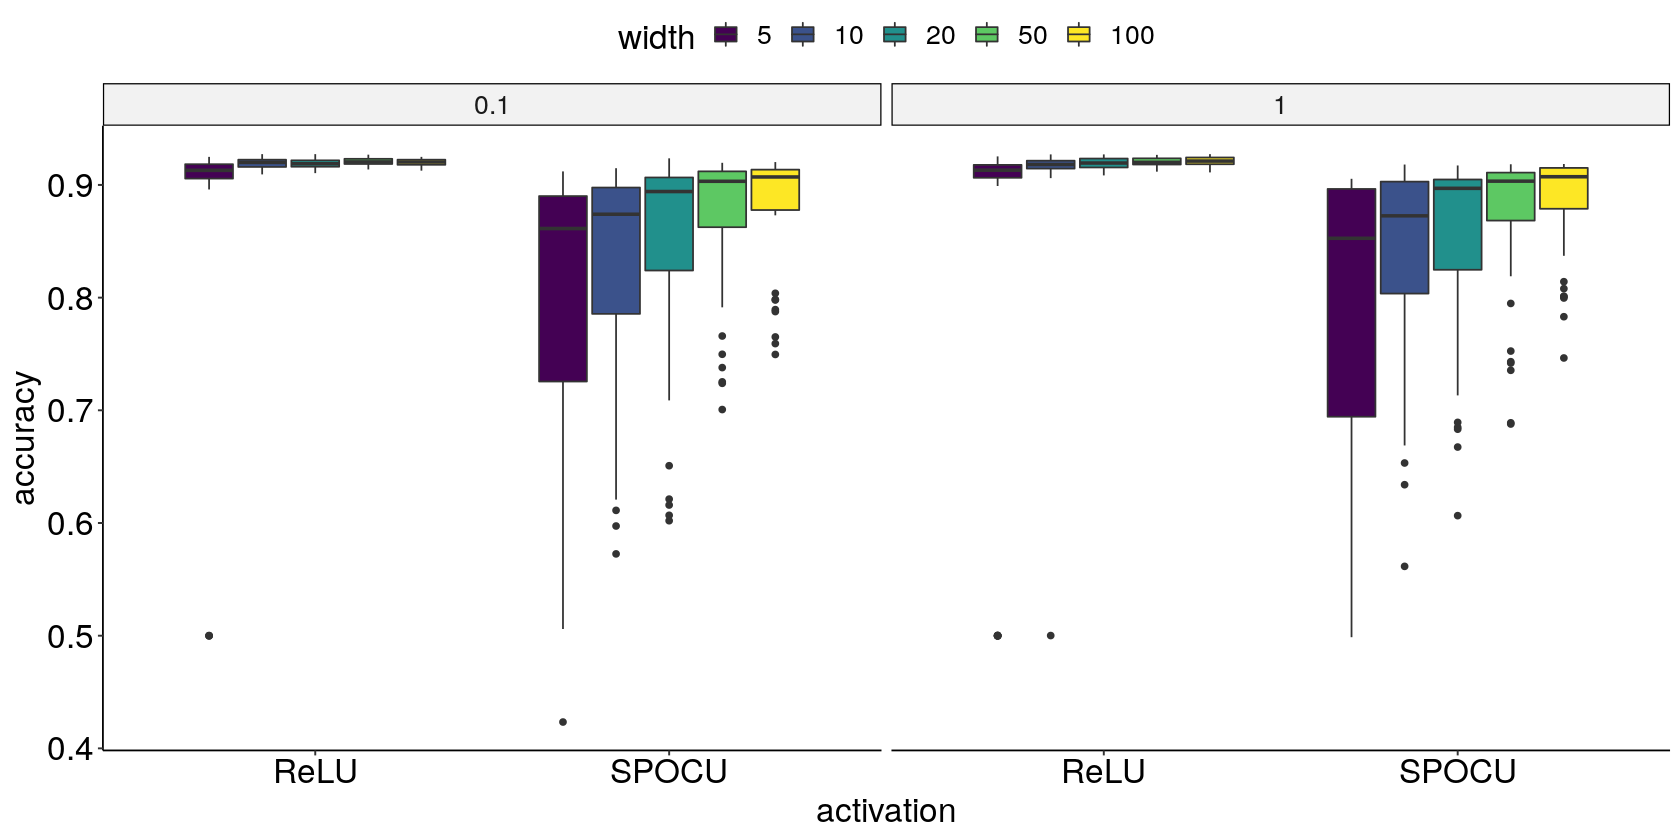

In [29]:
ggplot(data=df, aes(activation, accuracy)) + 
geom_boxplot(aes(fill=width)) + theme_pubr() + 
facet_wrap(~c) + 
theme(text=element_text(size=20))

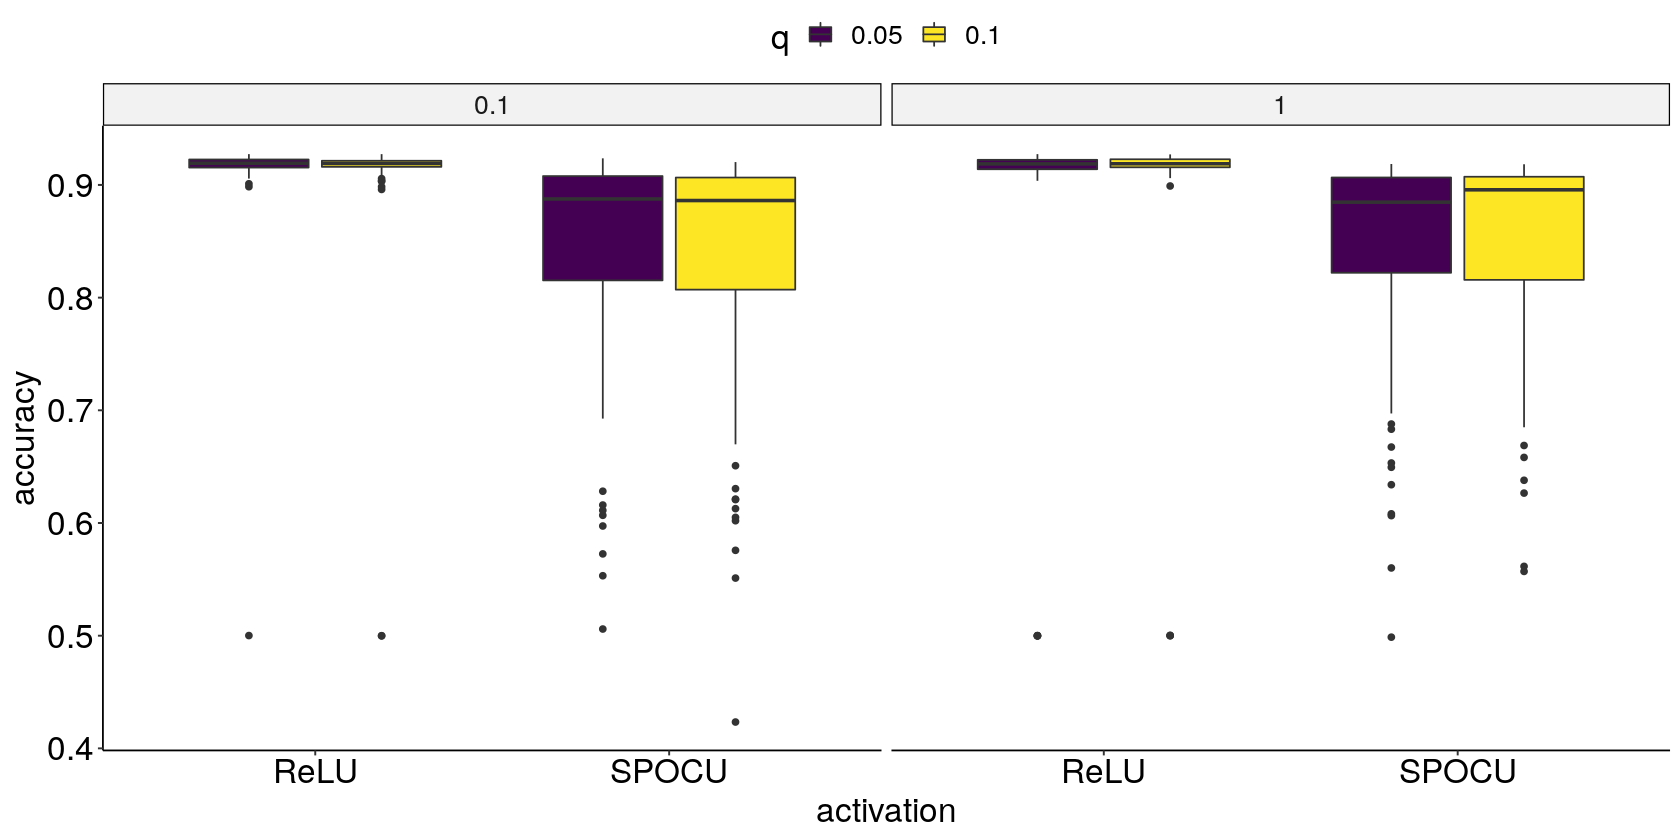

In [30]:
ggplot(data=df, aes(activation, accuracy)) + 
geom_boxplot(aes(fill=q)) + theme_pubr() + 
facet_wrap(~c) + 
theme(text=element_text(size=20))

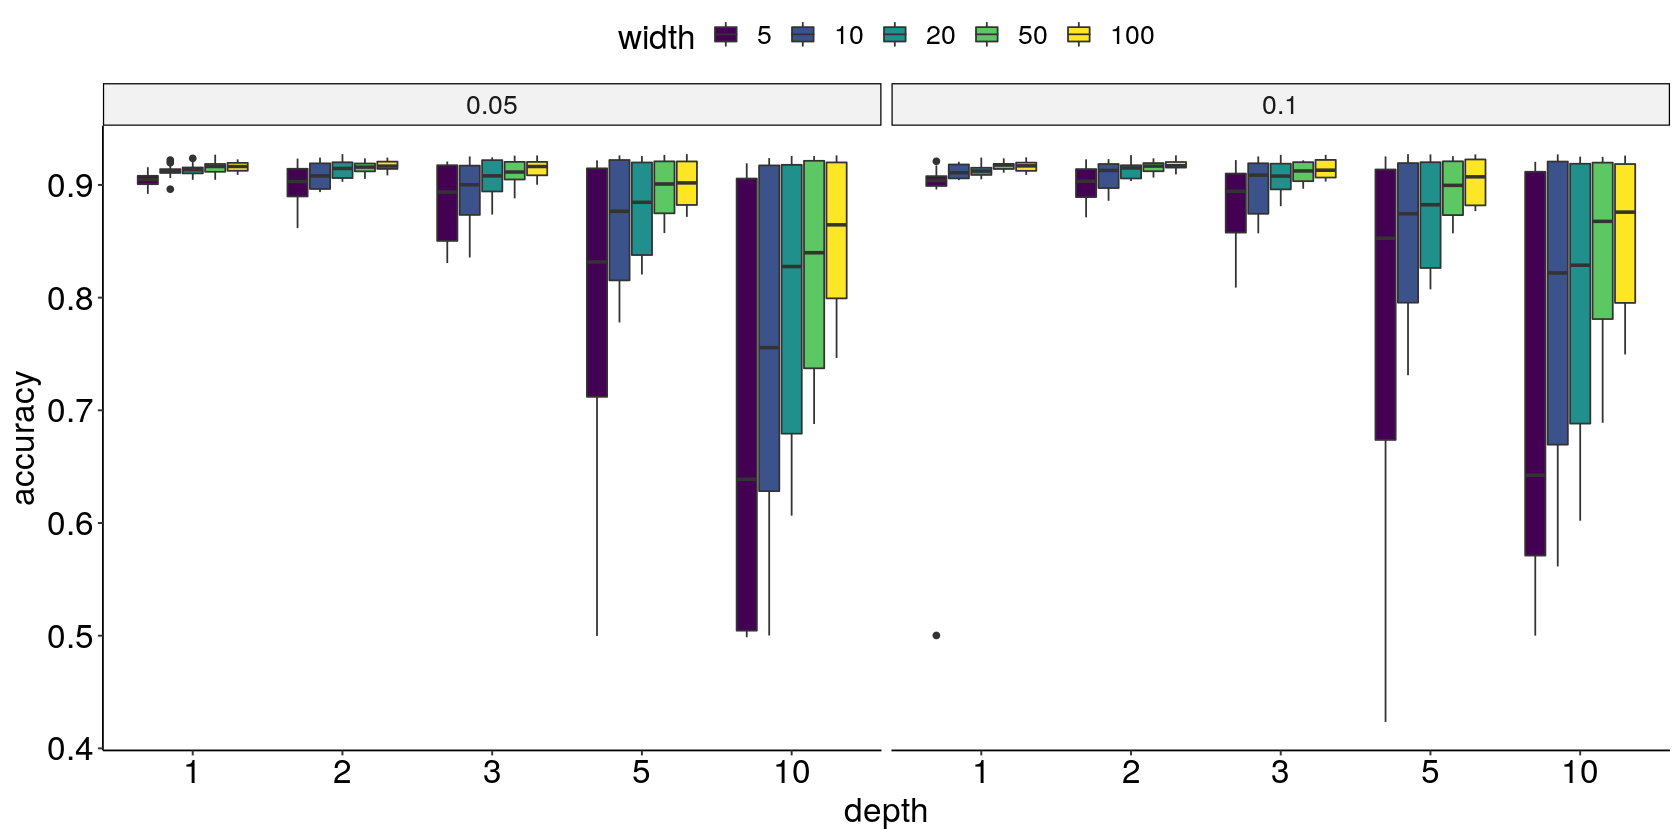

In [31]:
ggplot(data=df, aes(depth, accuracy)) + 
geom_boxplot(aes(fill=width)) + theme_pubr() + 
facet_wrap(~q) + 
theme(text=element_text(size=20))

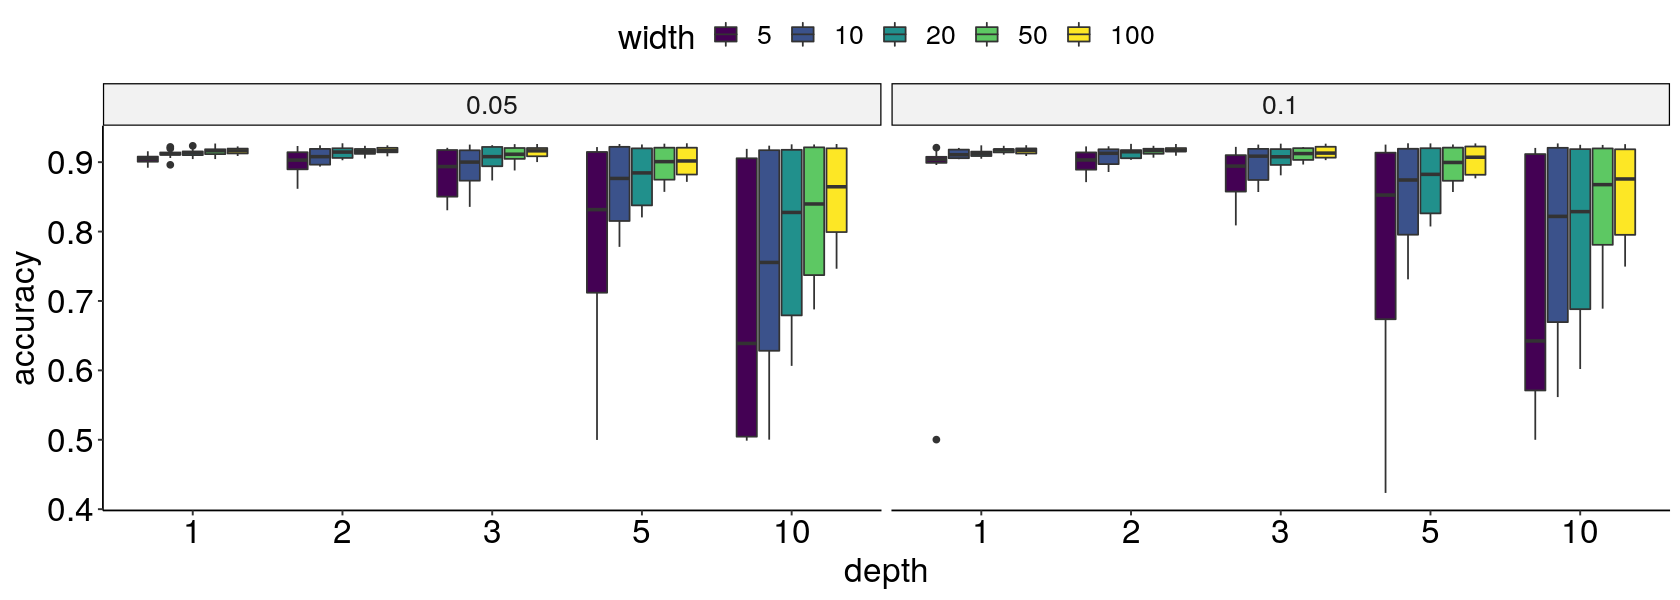

In [32]:
options(repr.plot.width=14, repr.plot.height=5)

ggplot(data=df, aes(depth, accuracy)) + 
geom_boxplot(aes(fill=width)) + theme_pubr() + 
facet_wrap(~q) + 
theme(text=element_text(size=20))

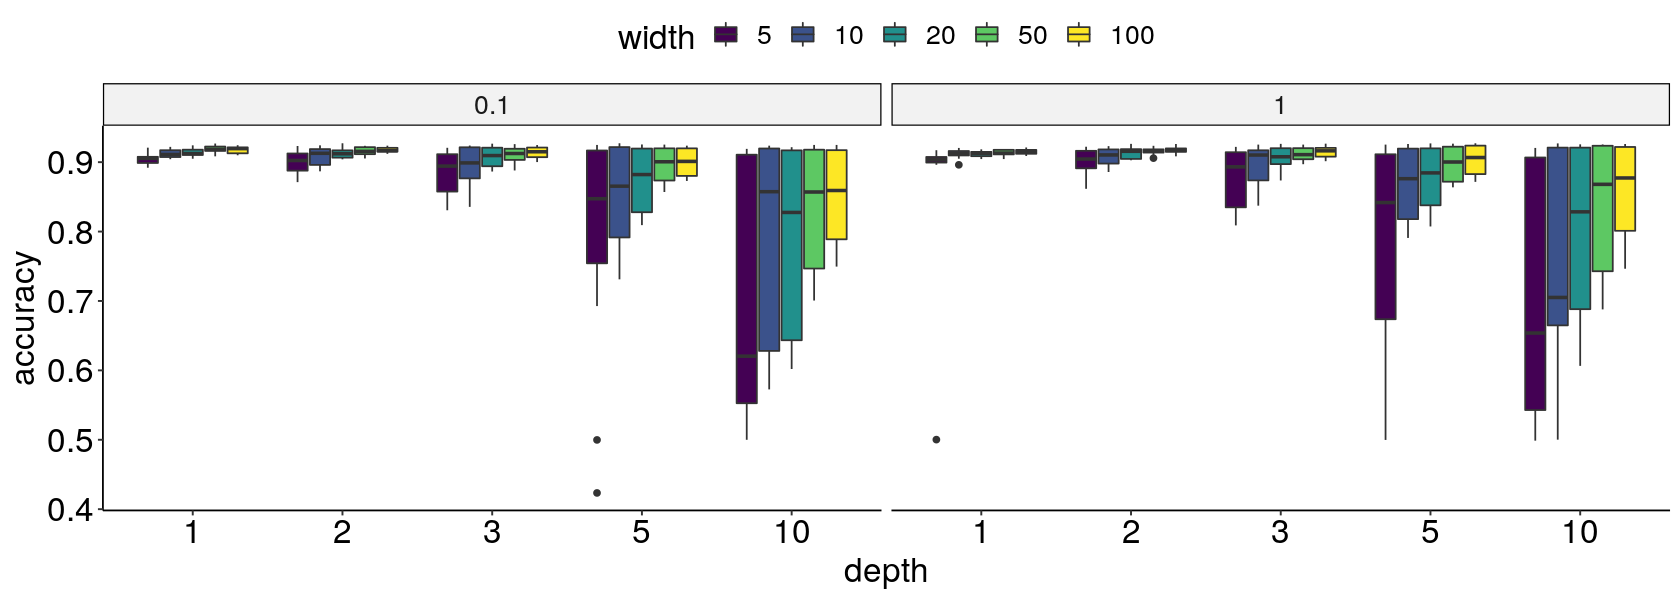

In [33]:
ggplot(data=df, aes(depth, accuracy)) + 
geom_boxplot(aes(fill=width)) + theme_pubr() + 
facet_wrap(~c) + 
theme(text=element_text(size=20))

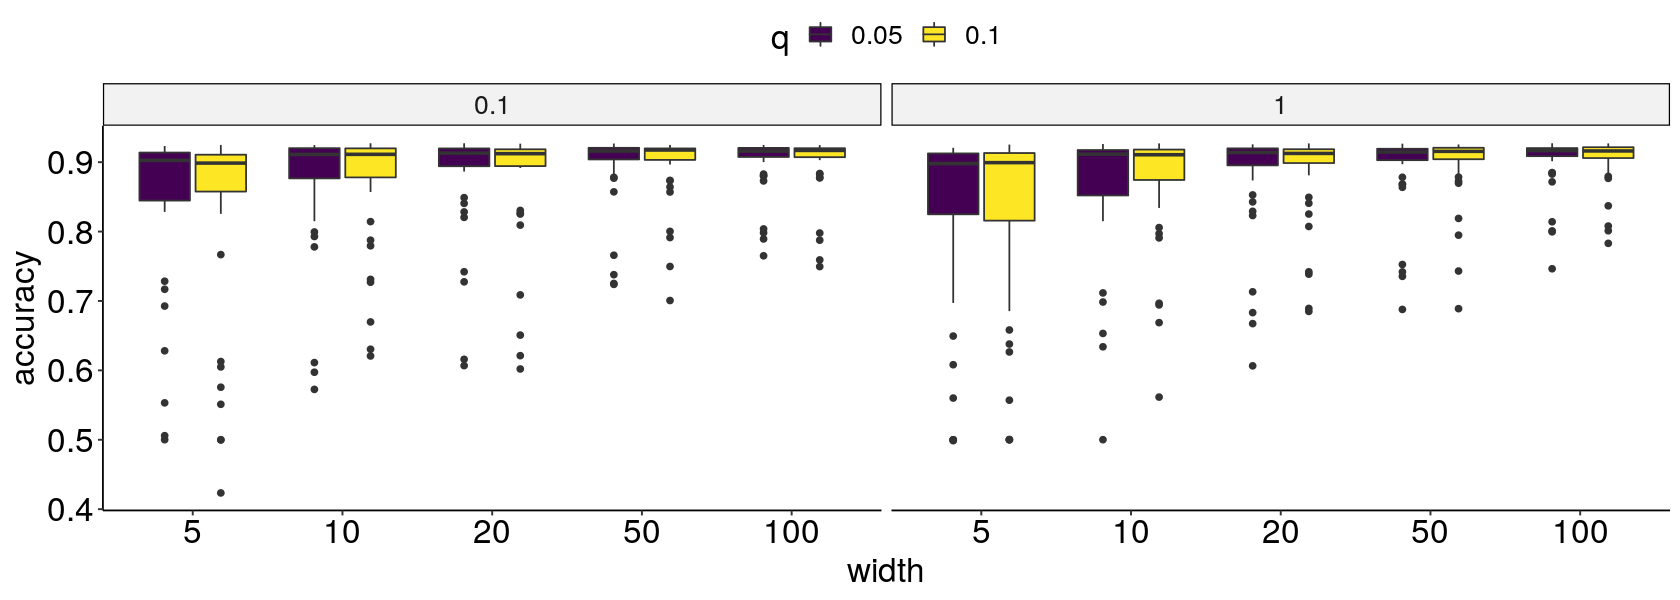

In [34]:
ggplot(data=df, aes(width, accuracy)) + 
geom_boxplot(aes(fill=q)) + theme_pubr() + 
facet_wrap(~c) + 
theme(text=element_text(size=20))